In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Inputs
def inputs():
    print('Filename: ')
    filename = str(input()).rstrip()
    input_img = imageio.imread('images/' + filename)
    print()
    print('Method(1, 2, 3 or 4): ')
    method = int(input())
    print()
    print('Save(0-No, 1-Yes): ')
    save = int(input())
    
    return input_img, method, save

In [3]:
def inversion():
    img_invert = 255-input_img
    return img_invert

In [4]:
def contrast_modulation():
    a = np.min(input_img)
    b = np.max(input_img)
    img_contrast = (input_img - a) * ((d-c)/(b-a)) + c    
    return img_contrast

In [37]:
def logarithmic():
    R = np.max(input_img)
    #img_log = (255 * (np.log2(1 + input_img) / np.log2(1 + R))).astype(np.uint8)
    
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    img_log = np.zeros(input_img.shape, dtype=float)

    # Loop through all pixels
    for x in range(rows):
        for y in range(cols):
            img_log[x,y] = 255 * (np.log2(1 + input_img[x,y]) / np.log2(1 + R))
    
    return img_log

In [6]:
def gamma_adjustment():
    img_gamma = (W * np.power(input_img, lambd)).astype(np.uint8)
    return img_gamma

In [8]:
# Compare with reference
def compare():
    accumulate = 0
    rows = input_img.shape[0]
    cols = input_img.shape[1]

    # Loop through all pixels
    for x in range(rows):
        for y in range(cols):
            accumulate += np.power(float(output_img[x,y]) - float(input_img[x,y]), 2)

    rse = np.around(np.sqrt(accumulate), decimals=4)
    print()
    print('RSE:' + str(rse))

In [38]:
# Starting the process
input_img, method, save = inputs()

# Select the transformation method
if method == 1:
    output_img = inversion()
if method == 2:
    print()
    print('Parameter c:')
    c = int(input())
    print()
    print('Parameter d:')
    d = int(input())
    output_img = contrast_modulation()
if method == 3:
    output_img = logarithmic()
if method == 4:
    print()
    print('Parameter W:')
    W = int(input())
    print()
    print('Parameter Lambda:')
    lambd = float(input())
    output_img = gamma_adjustment()
    
# Compare with reference
compare()

if save == 1:
    imageio.imwrite('output_img.png',output_img)

Filename: 
arara.png

Method(1, 2, 3 or 4): 
3

Save(0-No, 1-Yes): 
0

RSE:36385.0577


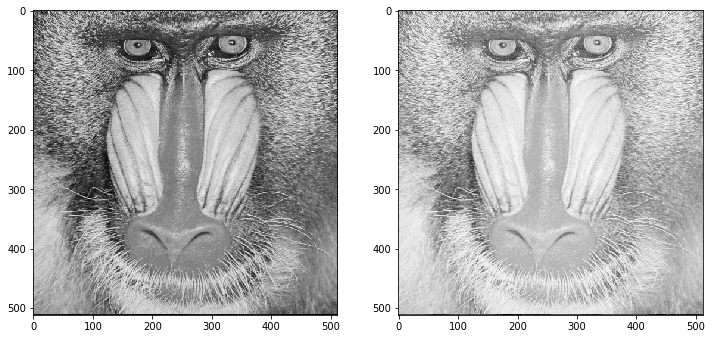

In [94]:
plt.figure(figsize=(12,12)) 
 
# defines a panel to show the images side by side
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(input_img, cmap='gray')

plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the second (2nd) position
plt.imshow(output_img, cmap='gray')

